In [2]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')


In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
URL="https://www.flipkart.com/search?q=smart%20phones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [5]:
page  = requests.get(URL)

In [6]:
page.status_code

200

In [7]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.493c50.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/appl

In [8]:
pagecontent = page.text

In [9]:
soup = BeautifulSoup(pagecontent)

In [10]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.493c50.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-to

In [11]:
# Titles Separation process
for x  in soup.find_all('div', attrs={'class':"_3pLy-c row"}):
    title = x.find('div', attrs={'class':'_4rR01T'})
    print(title.text)
    
    #_3LWZlK
    rating = x.find('div', attrs={'class':'_3LWZlK'})
    print(rating.text)
    
    # _2_R_DZ
    no_of_ratings = x.find('span', attrs={'class':'_2_R_DZ'})
    print(no_of_ratings.text)
    
    # _1xgFaf
    specs = x.find('ul', attrs={'class':'_1xgFaf'})
    print(specs.text)
    
    # _30jeq3 _1_WHN1
    price = x.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
    print(price.text)

realme C11 2021 (Cool Blue, 32 GB)
4.4
2,12,757 Ratings & 9,462 Reviews
2 GB RAM | 32 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) HD+ Display8MP Rear Camera | 5MP Front Camera5000 mAh BatteryOcta-core Processor1 Year Warranty for Mobile and 6 Months for Accessories
₹6,499
realme C11 2021 (Cool Grey, 32 GB)
4.4
2,12,757 Ratings & 9,462 Reviews
2 GB RAM | 32 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) HD+ Display8MP Rear Camera | 5MP Front Camera5000 mAh BatteryOcta-core Processor1 Year Warranty for Mobile and 6 Months for Accessories
₹6,499
realme C11 2021 (Cool Grey, 64 GB)
4.3
1,86,172 Ratings & 10,337 Reviews
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) HD+ Display8MP Rear Camera | 5MP Front Camera5000 mAh BatteryOcta-core Processor1 Year Warranty for Mobile and 6 Months for Accessories
₹7,999
realme C11 2021 (Cool Blue, 64 GB)
4.3
1,86,172 Ratings & 10,337 Reviews
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB16.51 cm (6.5 inch) HD+ Display8MP Rear C

In [12]:
# Extracting the data from all pages

titles=[] #List to store name of the product
prices=[] #List to store price of the product
ratings=[] #List to store rating of the product
num_of_rev_rating = [] #List to store the number of ratings & reviews of the product
specifications = [] # to store the specifications
pgno = []


for i in range(1,266):
    start_time = time.time()
    URL = 'https://www.flipkart.com/search?q=Smartphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i)
    pagecontent = requests.get(URL).text
    soup = BeautifulSoup(pagecontent)
    #print(URL)
    
    for mob  in soup.find_all('div', attrs={'class':"_3pLy-c row"}):
        title = mob.find('div', attrs={'class':'_4rR01T'})
        if title is None:
            titles.append(np.NaN)
        else:
            titles.append(title.text)

        #_3LWZlK
        rating = mob.find('div', attrs={'class':'_3LWZlK'})
        if rating is None:
            ratings.append(np.NaN)
        else:
            ratings.append(rating.text)

        # _2_R_DZ
        no_of_ratings = mob.find('span', attrs={'class':'_2_R_DZ'})
        if no_of_ratings is None:
            num_of_rev_rating.append(np.NaN)
        else:
            num_of_rev_rating.append(no_of_ratings.text)

        # _1xgFaf
        specs = mob.find('ul', attrs={'class':'_1xgFaf'})
        if specs is None:
            specifications.append(np.NaN)
        else:
            specifications.append(specs.text)

        # _30jeq3 _1_WHN1
        price = mob.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        if price is None:
            prices.append(np.NaN)
        else:
            prices.append(price.text)
            
        pgno.append(i)
    
    end_time = time.time()
    print('Page {} completed in {} seconds'. format(i, end_time-start_time))

Page 1 completed in 0.9815945625305176 seconds
Page 2 completed in 0.8996930122375488 seconds
Page 3 completed in 0.6634790897369385 seconds
Page 4 completed in 0.5416731834411621 seconds
Page 5 completed in 0.6694755554199219 seconds
Page 6 completed in 0.7983441352844238 seconds
Page 7 completed in 0.5737757682800293 seconds
Page 8 completed in 0.6787922382354736 seconds
Page 9 completed in 0.5867981910705566 seconds
Page 10 completed in 0.6174523830413818 seconds
Page 11 completed in 0.6908454895019531 seconds
Page 12 completed in 0.6919004917144775 seconds
Page 13 completed in 0.625185489654541 seconds
Page 14 completed in 0.7369489669799805 seconds
Page 15 completed in 0.601377010345459 seconds
Page 16 completed in 0.9007067680358887 seconds
Page 17 completed in 0.8226673603057861 seconds
Page 18 completed in 0.7479252815246582 seconds
Page 19 completed in 0.6450080871582031 seconds
Page 20 completed in 0.6272754669189453 seconds
Page 21 completed in 0.764876127243042 seconds
Page

In [117]:
mobile_df = pd.DataFrame({'Title' : titles, 'Price': prices,'Specifications' : specifications,'Rating': ratings, 'No_of_reviewsandratings': num_of_rev_rating,'PageNo': pgno})

In [118]:
mobile_df

,Title,Price,Specifications,Rating,No_of_reviewsandratings,PageNo
0,"realme C11 2021 (Cool Grey, 32 GB)","₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"2,12,756 Ratings & 9,462 Reviews",1
1,"realme C11 2021 (Cool Blue, 32 GB)","₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"2,12,756 Ratings & 9,462 Reviews",1
2,"realme C11 2021 (Cool Grey, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,"1,86,172 Ratings & 10,337 Reviews",1
3,"realme C11 2021 (Cool Blue, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,"1,86,172 Ratings & 10,337 Reviews",1
4,"REDMI 9i Sport (Carbon Black, 64 GB)","₹8,799",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,"1,19,876 Ratings & 6,818 Reviews",1
...,...,...,...,...,...,...
979,"APPLE iPhone 13 Pro (Gold, 128 GB)","₹1,19,900",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,760 Ratings & 74 Reviews,41
980,"APPLE iPhone SE (Black, 128 GB)","₹34,999",128 GB ROM11.94 cm (4.7 inch) Retina HD Displa...,4.5,"1,51,491 Ratings & 11,930 Reviews",41
981,"APPLE iPhone 13 Pro Max (Alpine Green, 128 GB)","₹1,29,900",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6,"1,169 Ratings & 137 Reviews",41
982,"Redmi Note 8 (Moonlight White, 64 GB)","₹12,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,"55,153 Ratings & 3,926 Reviews",41


# Data Seperation

In [189]:
# seperation of RAM
pattern = r'([0-9A-Za-z\s]+)RAM'
mobile_df['RAM_in_GB'] = mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))

#seperation of ROM
pattern = r'([A-Za-z0-9\s]+)ROM'
mobile_df['ROM'] = mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))

# brand
pattern=r'^\w+'
mobile_df['Brand']=mobile_df.Title.apply(lambda i: re.compile(pattern).findall(i))

#Screensize_inch
pattern=r'([0-9.\s]+)inch'
mobile_df['Screen_size_inches']=mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))


#Screensize_cm
pattern=r'([0-9.\s]+)cm'
mobile_df['Screen_size_cm']=mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))


# #seperation of Battery
pattern = r'([0-9\s]+)mAh[A-Za-z-\s|-]+Battery'
mobile_df['Batery'] = mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))


# #seperation of expandable memory
pattern = r'Upto[A-Za-z0-9-\s]+[GB|TB]'
mobile_df['ExandableMemory'] = mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))


# #seperation of camera
pattern = r'[0-9+MP|\s]+MP+|[0-9+A-Z|\s]+MP Rear Camera|[0-9+A-Z|\s]+MP Front Camera'
mobile_df['Camera'] = mobile_df.Specifications.apply(lambda i: re.compile(pattern).findall(i))




In [190]:
mobile_df.columns

Index(['Title', 'Price', 'Specifications', 'Rating', 'No_of_reviewsandratings',
       'PageNo', 'RAM_in_GB', 'ROM', 'Brand', 'Screen_size_inches',
       'Screen_size_cm', 'Batery', 'ExandableMemory', 'Camera'],
      dtype='object')

In [191]:
final_df = mobile_df[['Title', 'Price', 'Specifications', 'Rating', 'No_of_reviewsandratings',
       'PageNo', 'RAM_in_GB', 'ROM', 'Brand', 'Screen_size_inches',
       'Screen_size_cm', 'Batery', 'ExandableMemory', 'Camera']]

In [192]:
final_df

,Title,Price,Specifications,Rating,No_of_reviewsandratings,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera
0,"realme C11 2021 (Cool Grey, 32 GB)","₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"2,12,756 Ratings & 9,462 Reviews",1,[2 GB ],[ 32 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]"
1,"realme C11 2021 (Cool Blue, 32 GB)","₹6,499",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"2,12,756 Ratings & 9,462 Reviews",1,[2 GB ],[ 32 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]"
2,"realme C11 2021 (Cool Grey, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,"1,86,172 Ratings & 10,337 Reviews",1,[4 GB ],[ 64 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]"
3,"realme C11 2021 (Cool Blue, 64 GB)","₹7,999",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.3,"1,86,172 Ratings & 10,337 Reviews",1,[4 GB ],[ 64 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]"
4,"REDMI 9i Sport (Carbon Black, 64 GB)","₹8,799",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,"1,19,876 Ratings & 6,818 Reviews",1,[4 GB ],[ 64 GB ],[REDMI],[6.53 ],[16.59 ],[5000 ],[Upto 512 GB],"[13MP, | 5MP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"APPLE iPhone 13 Pro (Gold, 128 GB)","₹1,19,900",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,760 Ratings & 74 Reviews,41,[],[128 GB ],[APPLE],[6.1 ],[15.49 ],[],[],[12MP + 12MP + 12MP | 12MP]
980,"APPLE iPhone SE (Black, 128 GB)","₹34,999",128 GB ROM11.94 cm (4.7 inch) Retina HD Displa...,4.5,"1,51,491 Ratings & 11,930 Reviews",41,[],[128 GB ],[APPLE],[4.7 ],[11.94 ],[],[],"[12MP, | 7MP]"
981,"APPLE iPhone 13 Pro Max (Alpine Green, 128 GB)","₹1,29,900",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6,"1,169 Ratings & 137 Reviews",41,[],[128 GB ],[APPLE],[6.7 ],[17.02 ],[],[],[12MP + 12MP + 12MP | 12MP]
982,"Redmi Note 8 (Moonlight White, 64 GB)","₹12,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,"55,153 Ratings & 3,926 Reviews",41,[4 GB ],[ 64 GB ],[Redmi],[6.3 ],[16.0 ],[4000 ],[Upto 512 GB],[48MP + 8MP + 2MP + 2MP | 13MP]


In [193]:

final_df[['NO_of_ratings', 'NO_of_Reviews']] = final_df['No_of_reviewsandratings'].str.split('&', expand=True)


In [194]:
final_df.drop(['Specifications'],axis=1,inplace=True)

In [195]:
final_df.head()

,Title,Price,Rating,No_of_reviewsandratings,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
0,"realme C11 2021 (Cool Grey, 32 GB)","₹6,499",4.4,"2,12,756 Ratings & 9,462 Reviews",1,[2 GB ],[ 32 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]","2,12,756 Ratings","9,462 Reviews"
1,"realme C11 2021 (Cool Blue, 32 GB)","₹6,499",4.4,"2,12,756 Ratings & 9,462 Reviews",1,[2 GB ],[ 32 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]","2,12,756 Ratings","9,462 Reviews"
2,"realme C11 2021 (Cool Grey, 64 GB)","₹7,999",4.3,"1,86,172 Ratings & 10,337 Reviews",1,[4 GB ],[ 64 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]","1,86,172 Ratings","10,337 Reviews"
3,"realme C11 2021 (Cool Blue, 64 GB)","₹7,999",4.3,"1,86,172 Ratings & 10,337 Reviews",1,[4 GB ],[ 64 GB ],[realme],[6.5 ],[16.51 ],[5000 ],[Upto 256 GB],"[8MP, | 5MP]","1,86,172 Ratings","10,337 Reviews"
4,"REDMI 9i Sport (Carbon Black, 64 GB)","₹8,799",4.4,"1,19,876 Ratings & 6,818 Reviews",1,[4 GB ],[ 64 GB ],[REDMI],[6.53 ],[16.59 ],[5000 ],[Upto 512 GB],"[13MP, | 5MP]","1,19,876 Ratings","6,818 Reviews"


In [196]:
final_df['RAM_in_GB'] = final_df.RAM_in_GB.apply(lambda i:''.join(i))
final_df['ROM'] = final_df.ROM.apply(lambda i:''.join(i))
final_df['Camera'] = final_df.Camera.apply(lambda i:''.join(i))
final_df['Screen_size_inches'] = final_df.Screen_size_inches.apply(lambda i :''.join(i))
final_df['Screen_size_cm'] = final_df.Screen_size_cm.apply(lambda i :''.join(i))
final_df['Brand'] = final_df.Brand.apply(lambda i:''.join(i))
final_df['Batery'] = final_df.Batery.apply(lambda i:''.join(i))
final_df['ExandableMemory'] = final_df.ExandableMemory.apply(lambda i:''.join(i))

In [197]:
final_df.head()

,Title,Price,Rating,No_of_reviewsandratings,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
0,"realme C11 2021 (Cool Grey, 32 GB)","₹6,499",4.4,"2,12,756 Ratings & 9,462 Reviews",1,2 GB,32 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756 Ratings","9,462 Reviews"
1,"realme C11 2021 (Cool Blue, 32 GB)","₹6,499",4.4,"2,12,756 Ratings & 9,462 Reviews",1,2 GB,32 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756 Ratings","9,462 Reviews"
2,"realme C11 2021 (Cool Grey, 64 GB)","₹7,999",4.3,"1,86,172 Ratings & 10,337 Reviews",1,4 GB,64 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172 Ratings","10,337 Reviews"
3,"realme C11 2021 (Cool Blue, 64 GB)","₹7,999",4.3,"1,86,172 Ratings & 10,337 Reviews",1,4 GB,64 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172 Ratings","10,337 Reviews"
4,"REDMI 9i Sport (Carbon Black, 64 GB)","₹8,799",4.4,"1,19,876 Ratings & 6,818 Reviews",1,4 GB,64 GB,REDMI,6.53,16.59,5000,Upto 512 GB,13MP | 5MP,"1,19,876 Ratings","6,818 Reviews"


In [198]:
final_df.to_excel(r'C:\Users\polid\OneDrive\Desktop\sujith\Flipcart_mobil_data.xlsx')

In [199]:
#pd.read_excel(r'C:\Users\polid\OneDrive\Desktop\sujith\Flipcart_mobil_data.xlsx')

#  Data Cleaning 

In [200]:
final_df['Price']=final_df['Price'].str.replace('₹','').str.replace(',','').astype(float)
final_df['RAM_in_GB']=final_df['RAM_in_GB'].str.replace('GB','')
final_df['NO_of_ratings']=final_df['NO_of_ratings'].str.replace('Ratings','')
final_df['NO_of_Reviews']=final_df['NO_of_Reviews'].str.replace('Reviews','')





# Handling missing values

In [201]:
final_df.isna().sum()

Title                      0
Price                      0
Rating                     1
No_of_reviewsandratings    1
PageNo                     0
RAM_in_GB                  0
ROM                        0
Brand                      0
Screen_size_inches         0
Screen_size_cm             0
Batery                     0
ExandableMemory            0
Camera                     0
NO_of_ratings              1
NO_of_Reviews              1
dtype: int64

In [202]:
final_df.drop('No_of_reviewsandratings',axis=1,inplace=True)

In [203]:
#Identify corrupted data
# final_df[~final_df['Rating'].isna()]['Rating']
final_df[final_df.Rating.isna()]

# get the non-numeric rows
np.where(final_df.Rating.str.isnumeric(),1,final_df.Rating)


,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
148,"realme C35 (Glowing Green, 128 GB)",13999.0,NaN,7,6,128 GB,realme,6.6,16.76,5000,Upto 1 TB,50MP + 2MP3MP | 8MP,NaN,NaN


array(['4.4', '4.4', '4.3', '4.3', '4.4', '4.5', '4.4', '4.5', '4.4',
       '4.3', '4.4', '4.4', '4.4', '4.4', '4.4', '4.4', '4.3', '4.5',
       '4.5', '4.5', '4.4', '4.4', '4.5', '4.4', '4.3', '4.2', '4.4',
       '4.5', '4.5', '4.4', '4.3', '4.4', '4.4', '4.5', '4.3', '4.4',
       '4.2', '4.3', '4.4', '4.5', '4.4', '4.4', '4.5', '4.4', '4.5',
       '4.5', '4.3', '4.4', '4.5', '4.4', '4.4', '4.4', '4.4', '4.3',
       '4.3', '4.3', '4.2', '4.3', '4.4', '4.4', '4.3', '4.5', '4.4',
       '4.5', '4.4', '4.4', '4.5', '4.5', '4.3', '4.3', '4.3', '4.5',
       '4.3', '4.3', '4.3', '4.3', '4.3', '4.3', '4.3', '4.6', '4.3',
       '4.3', '4.1', '4.4', '4.4', '4.3', '4.4', '4.3', '4.4', '4.3',
       '4.5', '4.3', '4.5', '4.3', '4.3', '4.3', '4.3', '4.3', '4.4',
       '4.1', '4.3', '4.3', '4.4', '4.1', '4.3', '4.3', '4.3', '4.3',
       '4.4', '4.3', '4.3', '4.3', '4.4', '4.3', '4.4', '4.2', '4.3',
       '4.6', '4.4', '4.3', '4.3', '4.1', '4.4', '4.3', '4.1', '4.4',
       '4.3', '4.3',

In [204]:
final_df.Rating.astype(float).mean()
final_df.Rating.astype(float).median()

final_df.Rating.mode()

4.276602238046802

4.3

0    4.3
Name: Rating, dtype: object

In [205]:
# Replacing nan value of rating with median of rating
final_df.Rating = final_df.Rating.fillna(final_df.Rating.median())
final_df.Rating.isna().sum()

0

In [206]:
final_df['Rating'] = final_df.Rating.astype(float)
final_df['Batery'].value_counts().unique
final_df

<bound method Series.unique of 5000     519
6000      98
          88
4500      70
4230      29
5020      28
4000      26
4200      14
5160      12
4310      10
4300      10
3000       8
4250       8
4700       7
4035       5
3020       5
5065       5
4050       4
4600       4
4400       4
4450       3
3300       3
5050       3
5200       3
5018       2
2400       2
4020       2
3200       2
4520       2
4030       1
3950       1
4950       1
3080       1
3400       1
4350       1
4015       1
3030       1
Name: Batery, dtype: int64>

,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
0,"realme C11 2021 (Cool Grey, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
1,"realme C11 2021 (Cool Blue, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
2,"realme C11 2021 (Cool Grey, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
3,"realme C11 2021 (Cool Blue, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.5,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
4,"REDMI 9i Sport (Carbon Black, 64 GB)",8799.0,4.4,1,4,64 GB,REDMI,6.53,16.59,5000,Upto 512 GB,13MP | 5MP,"1,19,876","6,818"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"APPLE iPhone 13 Pro (Gold, 128 GB)",119900.0,4.7,41,,128 GB,APPLE,6.1,15.49,,,12MP + 12MP + 12MP | 12MP,760,74
980,"APPLE iPhone SE (Black, 128 GB)",34999.0,4.5,41,,128 GB,APPLE,4.7,11.94,,,12MP | 7MP,"1,51,491","11,930"
981,"APPLE iPhone 13 Pro Max (Alpine Green, 128 GB)",129900.0,4.6,41,,128 GB,APPLE,6.7,17.02,,,12MP + 12MP + 12MP | 12MP,"1,169",137
982,"Redmi Note 8 (Moonlight White, 64 GB)",12999.0,4.4,41,4,64 GB,Redmi,6.3,16.0,4000,Upto 512 GB,48MP + 8MP + 2MP + 2MP | 13MP,"55,153","3,926"


In [207]:

final_df = final_df.replace(r'^\s*$', np.nan, regex=True)


In [208]:
final_df['Batery'] = final_df['Batery'].replace(np.nan, 0)
final_df['RAM_in_GB'] = final_df['RAM_in_GB'].replace(np.nan, 'APPLE')

final_df['Screen_size_cm'] = final_df['Screen_size_cm'].replace(np.nan, '0')
final_df['Screen_size_inches'] = final_df['Screen_size_inches'].replace(np.nan, '0')



In [209]:
final_df['Batery'] = final_df['Batery'].astype(int)
final_df['Screen_size_cm'] = final_df['Screen_size_cm'].astype(float)
final_df['Screen_size_inches'] = final_df['Screen_size_inches'].astype(float)






In [315]:
final_df.head()

,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
0,"realme C11 2021 (Cool Grey, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
1,"realme C11 2021 (Cool Blue, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
2,"realme C11 2021 (Cool Grey, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
3,"realme C11 2021 (Cool Blue, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
4,"REDMI 9i Sport (Carbon Black, 64 GB)",8799.0,4.4,1,4,64 GB,REDMI,6.53,16.59,5000,Upto 512 GB,13MP | 5MP,"1,19,876","6,818"


In [261]:
final_df.to_csv(r'C:\Users\polid\OneDrive\Desktop\sujith\flipcartmobil_clean_data.csv')

# Data visualization (EDA)

In [262]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               984 non-null    object 
 1   Price               984 non-null    float64
 2   Rating              984 non-null    float64
 3   PageNo              984 non-null    int64  
 4   RAM_in_GB           984 non-null    object 
 5   ROM                 984 non-null    object 
 6   Brand               984 non-null    object 
 7   Screen_size_inches  984 non-null    float64
 8   Screen_size_cm      984 non-null    float64
 9   Batery              984 non-null    int32  
 10  ExandableMemory     609 non-null    object 
 11  Camera              984 non-null    object 
 12  NO_of_ratings       983 non-null    object 
 13  NO_of_Reviews       983 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 103.9+ KB


In [263]:
final_df.describe()

,Price,Rating,PageNo,Screen_size_inches,Screen_size_cm,Batery
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,23526.264228,4.276626,21.000000,6.452458,16.405315,4470.397358
std,23167.686040,0.214866,11.838176,0.391305,0.844796,1500.896520
min,3568.000000,2.300000,1.000000,0.000000,11.940000,0.000000
25%,11499.000000,4.200000,11.000000,6.430000,16.330000,4500.000000
50%,15999.000000,4.300000,21.000000,6.520000,16.560000,5000.000000
75%,24999.000000,4.400000,31.000000,6.600000,16.760000,5000.000000
max,179900.000000,4.700000,41.000000,7.000000,17.780000,6000.000000


# Countplot

<Figure size 1440x504 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='count'>

Text(0.5, 1.0, 'plot of each Brand with Count')

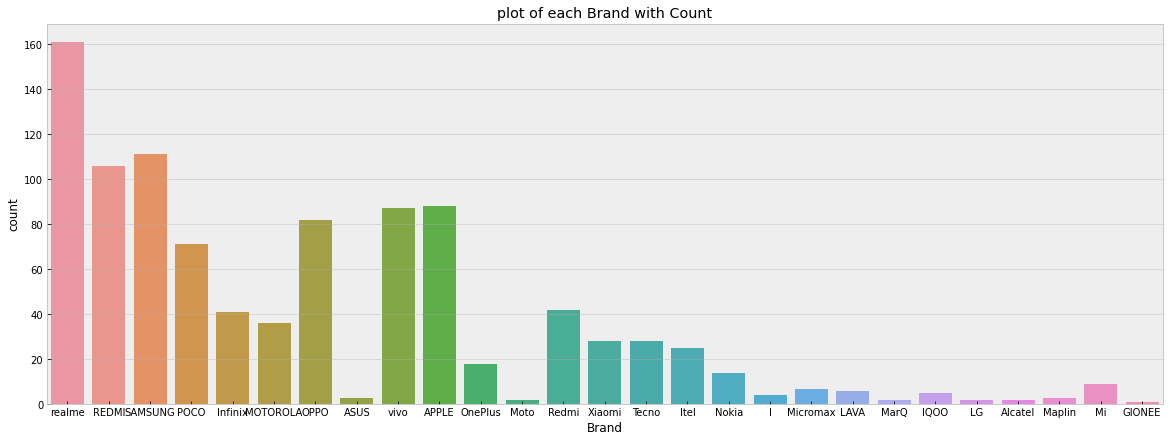

In [264]:
plt.figure(figsize = (20,7))
sns.countplot(x=final_df['Brand'])
plt.title('plot of each Brand with Count')
plt.show()

In [215]:
final_df.Brand.value_counts()

realme      161
SAMSUNG     111
REDMI       106
APPLE        88
vivo         87
OPPO         82
POCO         71
Redmi        42
Infinix      41
MOTOROLA     36
Tecno        28
Xiaomi       28
Itel         25
OnePlus      18
Nokia        14
Mi            9
Micromax      7
LAVA          6
IQOO          5
I             4
ASUS          3
Maplin        3
Moto          2
MarQ          2
LG            2
Alcatel       2
GIONEE        1
Name: Brand, dtype: int64

# Categorization of Mobiles according to ratings

<Figure size 1440x504 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='count'>

Text(0.5, 1.0, 'Mobile Rating count plot')

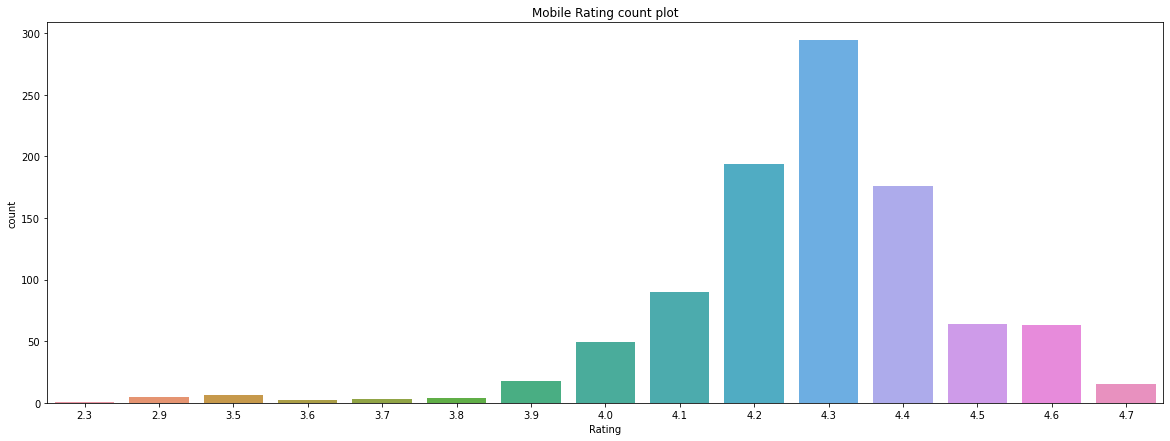

In [216]:
plt.figure(figsize = (20,7))
sns.countplot(x = final_df['Rating'])
plt.title('Mobile Rating count plot')
plt.show()

In [267]:
final_df.Rating.value_counts()

4.3    294
4.2    194
4.4    176
4.1     90
4.5     64
4.6     63
4.0     49
3.9     18
4.7     15
3.5      6
2.9      5
3.8      4
3.7      3
3.6      2
2.3      1
Name: Rating, dtype: int64

# RAM_in_GB value_counts`

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Ram_in_Gb')

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'RAM_in_GB count')

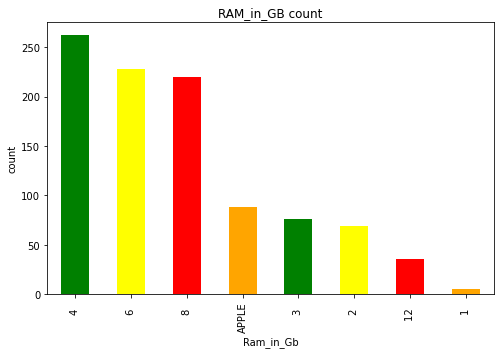

In [217]:
plt.figure(figsize=(8,5))
final_df['RAM_in_GB'].value_counts().plot.bar(color = ['Green','Yellow','Red','Orange'])
plt.xlabel('Ram_in_Gb')
plt.ylabel('count')
plt.title('RAM_in_GB count')
plt.show()

In [279]:
final_df.RAM_in_GB.value_counts()

4        262
6        228
8        220
APPLE     88
3         76
2         69
12        36
1          5
Name: RAM_in_GB, dtype: int64

# count of ROM

<Figure size 1800x576 with 0 Axes>

<AxesSubplot:xlabel='ROM', ylabel='count'>

Text(0.5, 1.0, 'ROM count')

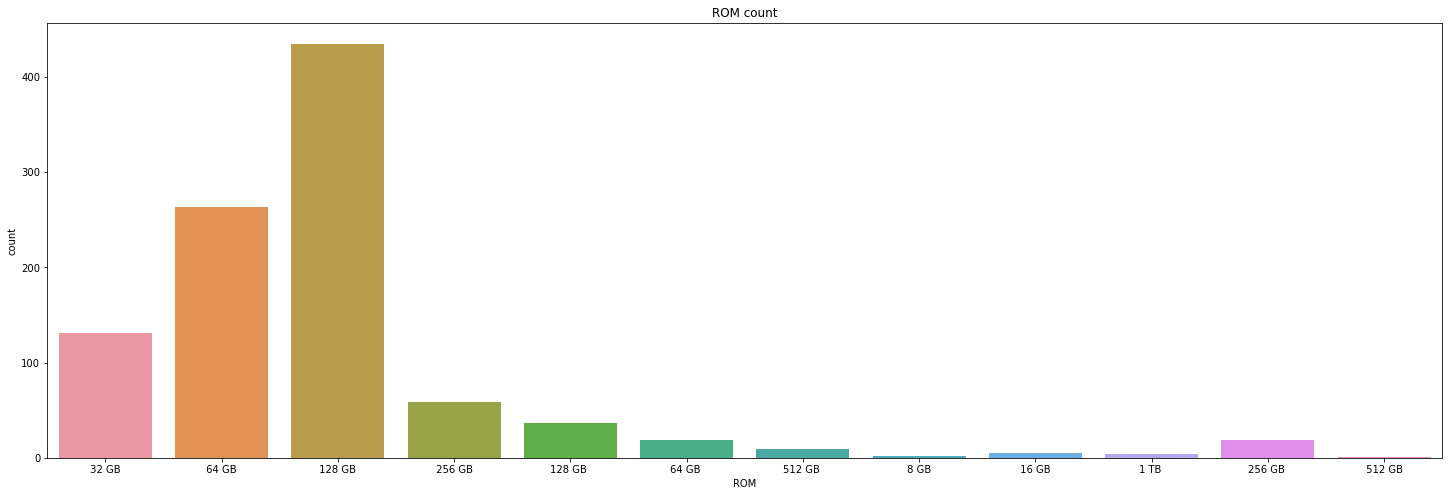

In [218]:
plt.figure(figsize = (25,8))
sns.countplot(x=final_df['ROM'])
plt.title('ROM count')
plt.show()

In [219]:
final_df.ROM.value_counts().unique

<bound method Series.unique of  128 GB     435
 64 GB      263
 32 GB      131
 256 GB      59
128 GB       37
64 GB        19
256 GB       19
512 GB        9
 16 GB        5
1 TB          4
 8 GB         2
 512 GB       1
Name: ROM, dtype: int64>

# Mobiles brands available below 50k budget

In [287]:
cst = final_df[(final_df['Price']<=50000)]

<Figure size 15000x3000 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

Text(0.5, 1.0, 'Mobile brands available below 50k budget')

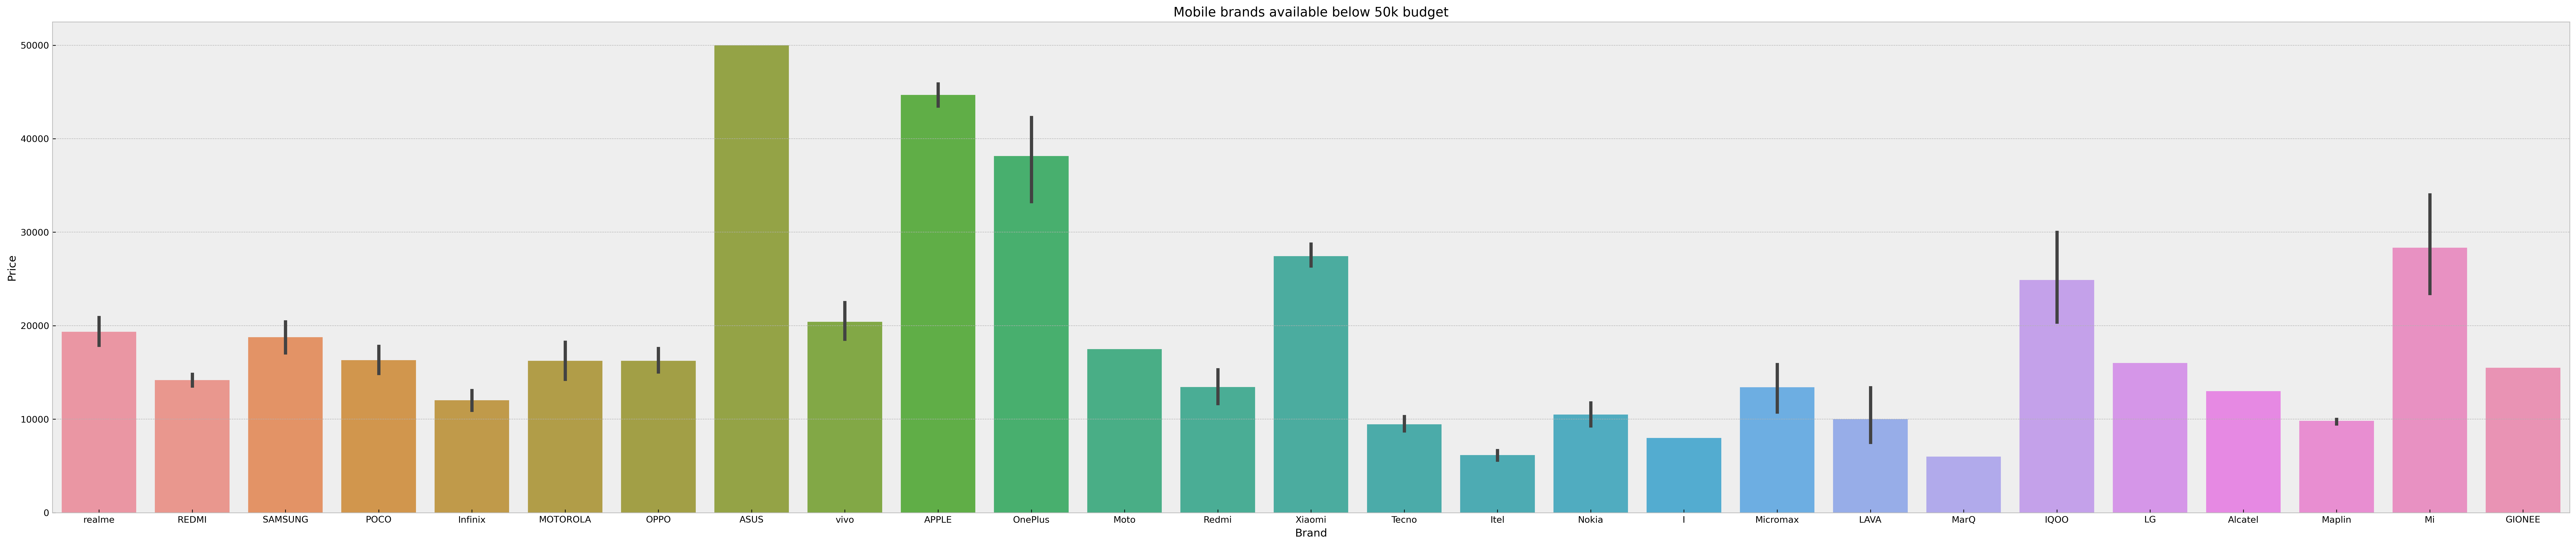

In [299]:
plt.figure(figsize = (50,10),dpi=300)
sns.barplot(x = cst['Brand'], y =cst['Price'])
plt.title('Mobile brands available below 50k budget')
plt.show()


# Mobiles brands available above 50k budget


In [222]:
cst2 = final_df[(final_df['Price']>=50000)]

<Figure size 15000x3000 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

Text(0.5, 1.0, 'Mobile brands available below 50k budget')

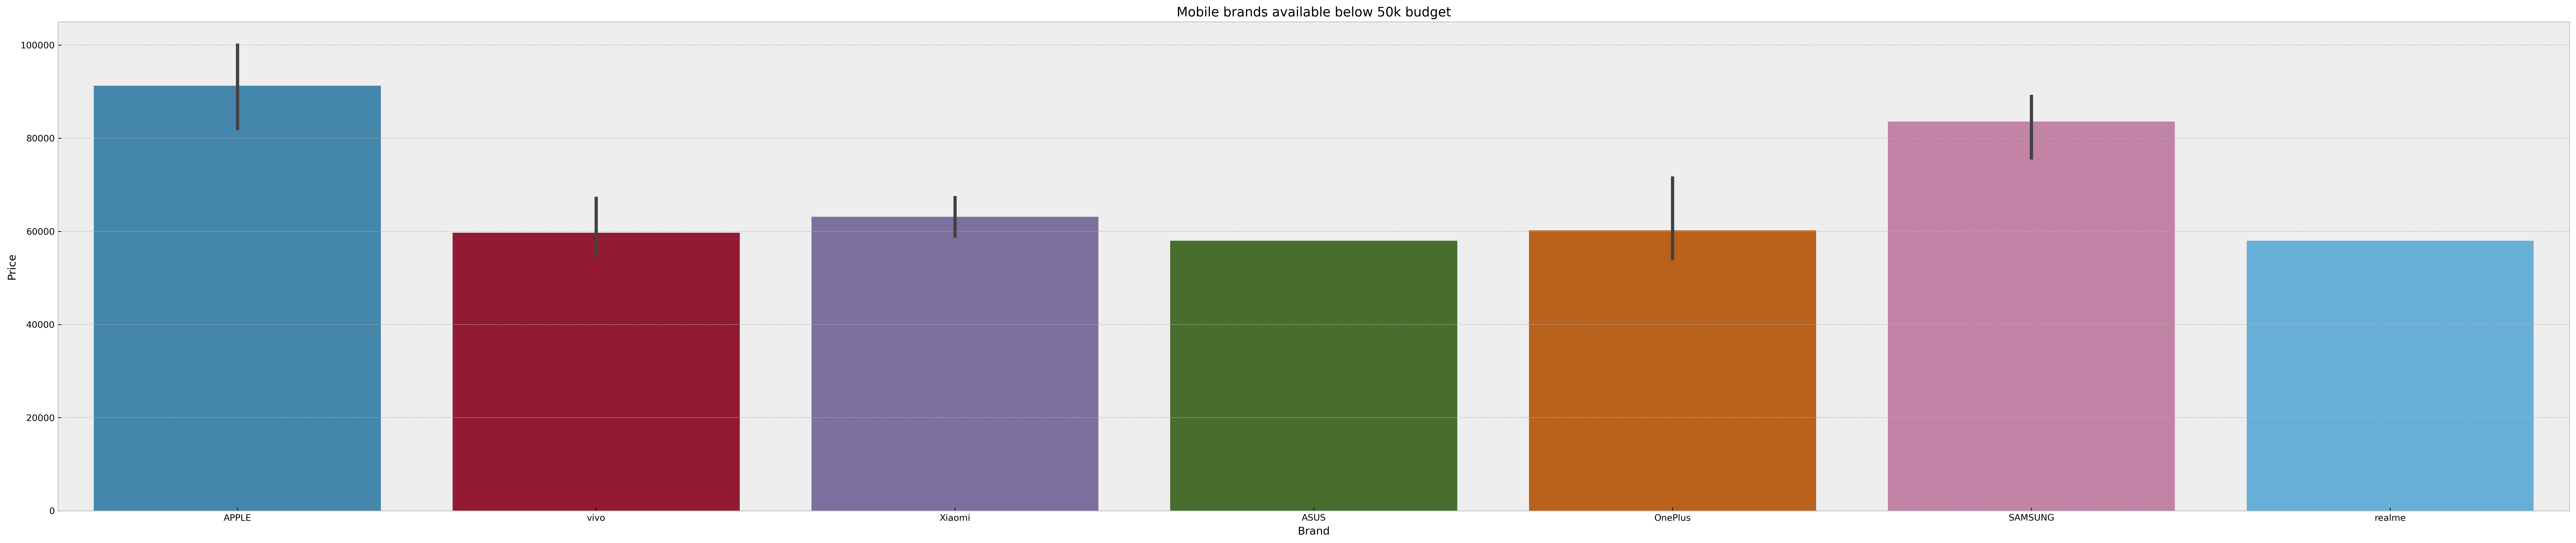

In [293]:
plt.figure(figsize = (50,10),dpi=300)
sns.barplot(x = cst2['Brand'], y =cst2['Price'])
plt.title('Mobile brands available below 50k budget')
plt.show()


Title                 83
Price                 83
Rating                83
PageNo                83
RAM_in_GB             83
ROM                   83
Brand                 83
Screen_size_inches    83
Screen_size_cm        83
Batery                83
ExandableMemory        1
Camera                83
NO_of_ratings         83
NO_of_Reviews         83
dtype: int64

## Price vs rating


Text(0.5, 1.0, 'Price vs Rating')

<AxesSubplot:title={'center':'Price vs Rating'}, xlabel='Price', ylabel='Rating'>

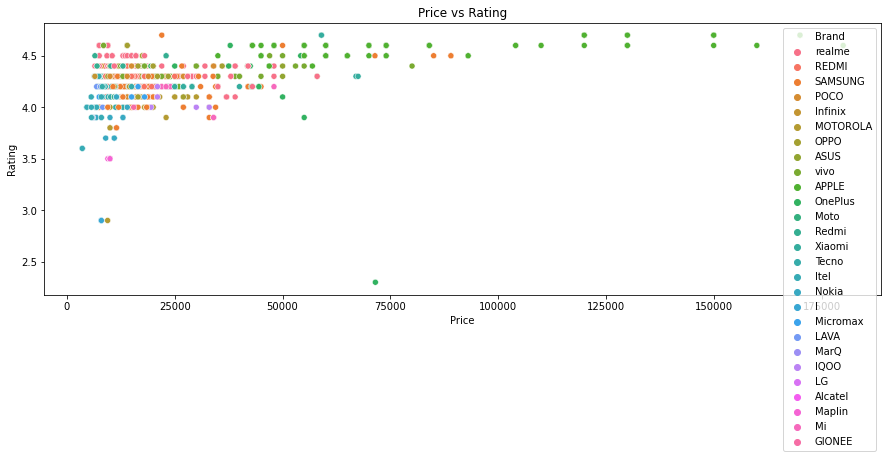

In [224]:
size = (15, 5)
fig, ax = plt.subplots(figsize=size)
plt.title('Price vs Rating')
sns.scatterplot(x='Price', y = 'Rating', hue= 'Brand', data = final_df)
plt.show()

# Ram_GB and Price

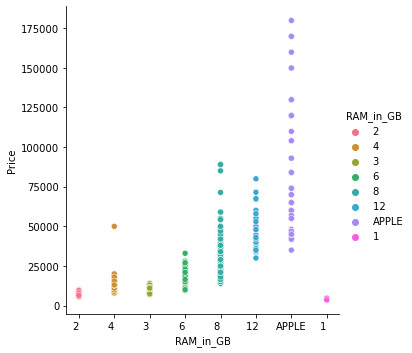

In [225]:
sns.relplot(x = 'RAM_in_GB',y = 'Price',data = final_df ,hue = 'RAM_in_GB')
plt.show()

# Pie plot

## Distribution of mobiles  as per Brand


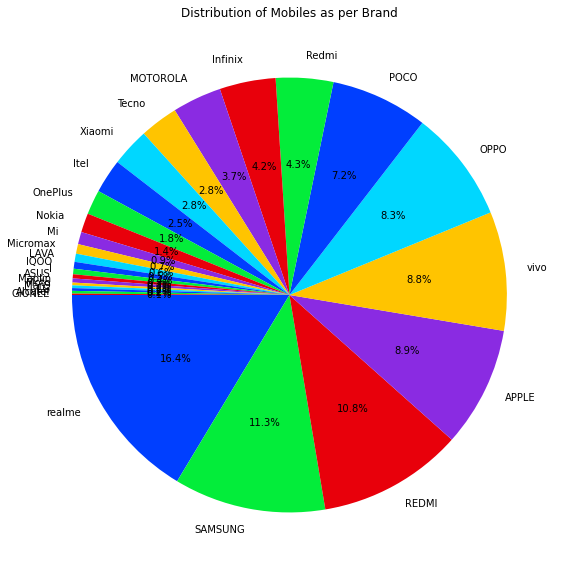

In [226]:
Brand_counts = final_df.Brand.value_counts()
Brand_counts
plt.figure(figsize=(10,10))
plt.title('Distribution of Mobiles as per Brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%',startangle=180);

# DistPlot

# Distribution of price for Mobiles

<Figure size 1440x504 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Density'>

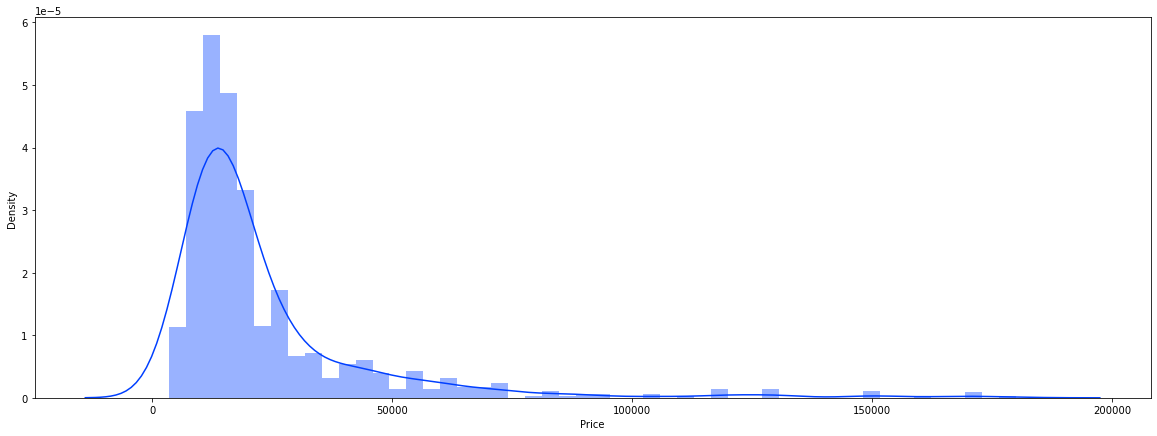

In [227]:
plt.figure(figsize = (20,7))
sns.distplot(final_df['Price'])
plt.show()


# Histogram


### kind of Rating mobiles have

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

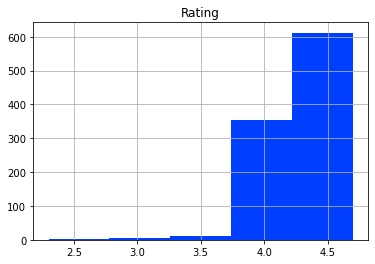

In [228]:
final_df.hist('Rating', bins = 5)
plt.show()

# Scatter plot

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

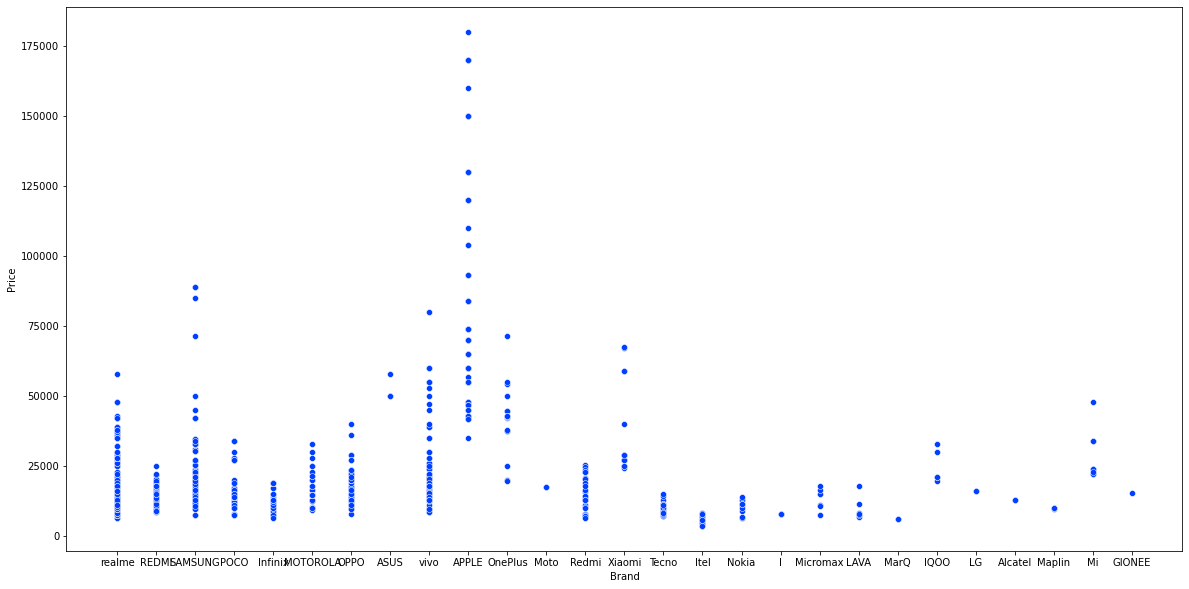

In [229]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Brand', y ='Price',data = final_df)
plt.show()

### Mobiles under range of INR 50,000 and with 4 to 5 ratings


In [230]:
cst = final_df[(final_df['Price']<=50000) & (final_df['Rating']>=4.0)]

In [231]:
cst.Brand.value_counts()

realme      160
REDMI       106
SAMSUNG     104
OPPO         82
vivo         80
POCO         71
Redmi        42
Infinix      41
MOTOROLA     29
Tecno        28
APPLE        25
Xiaomi       24
Itel         18
OnePlus      15
Mi            7
Micromax      7
LAVA          6
Nokia         5
IQOO          5
Alcatel       2
ASUS          2
LG            2
Moto          2
GIONEE        1
Name: Brand, dtype: int64

In [232]:
cst

,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
0,"realme C11 2021 (Cool Grey, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
1,"realme C11 2021 (Cool Blue, 32 GB)",6499.0,4.4,1,2,32 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"2,12,756","9,462"
2,"realme C11 2021 (Cool Grey, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
3,"realme C11 2021 (Cool Blue, 64 GB)",7999.0,4.3,1,4,64 GB,realme,6.50,16.51,5000,Upto 256 GB,8MP | 5MP,"1,86,172","10,337"
4,"REDMI 9i Sport (Carbon Black, 64 GB)",8799.0,4.4,1,4,64 GB,REDMI,6.53,16.59,5000,Upto 512 GB,13MP | 5MP,"1,19,876","6,818"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,"realme GT 5G (Dashing Blue, 128 GB)",37999.0,4.3,41,8,128 GB,realme,6.43,16.33,4500,NaN,64MP + 8MP + 2MP | 16MP,468,74
977,"Infinix Smart HD 2021 (Obsidian Black, 32 GB)",6499.0,4.3,41,2,32 GB,Infinix,6.10,15.49,5000,Upto 256 GB,8MP | 5MP,"65,475","4,282"
978,"realme C12 (Power Silver, 32 GB)",10999.0,4.4,41,3,32 GB,realme,6.52,16.56,6000,Upto 256 GB,13MP + 2MP + 2MP | 5MP,"3,20,363","19,469"
980,"APPLE iPhone SE (Black, 128 GB)",34999.0,4.5,41,APPLE,128 GB,APPLE,4.70,11.94,0,NaN,12MP | 7MP,"1,51,491","11,930"


Text(0.5, 1.0, 'Mobiles with Price Below 50,000 and Rating = 4 to 5')

<AxesSubplot:title={'center':'Mobiles with Price Below 50,000 and Rating = 4 to 5'}, xlabel='Price', ylabel='Rating'>

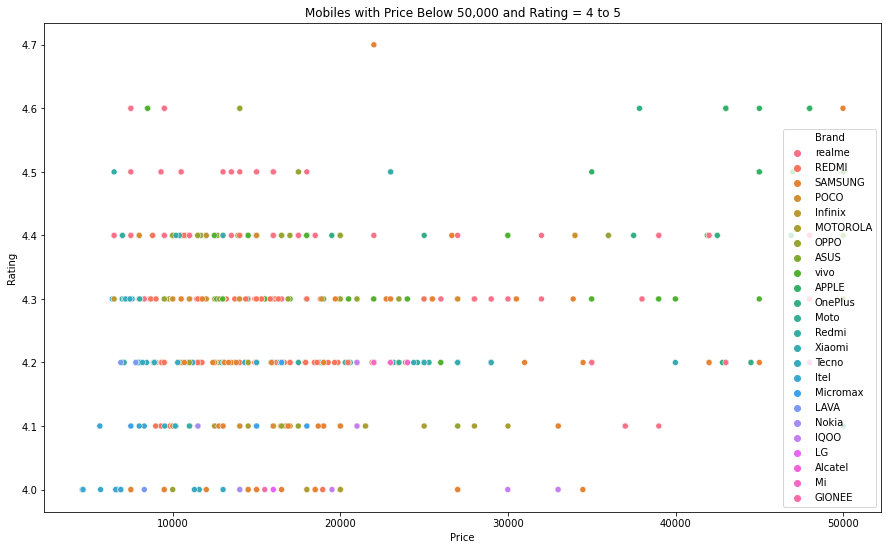

In [233]:
size = (15, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('Mobiles with Price Below 50,000 and Rating = 4 to 5')
sns.scatterplot(data=cst,x=cst['Price'], y=cst['Rating'],hue = 'Brand',estimator=np.max)
plt.show()

# Line plot

Mobiles under 50,000


In [234]:
cst1 = final_df[(final_df['Price']>=0) & (final_df['Price']<=50000)]

<Figure size 2160x648 with 0 Axes>

Text(0.5, 1.0, 'Laptops under INR 50,000')

<AxesSubplot:title={'center':'Laptops under INR 50,000'}, xlabel='Brand', ylabel='Price'>

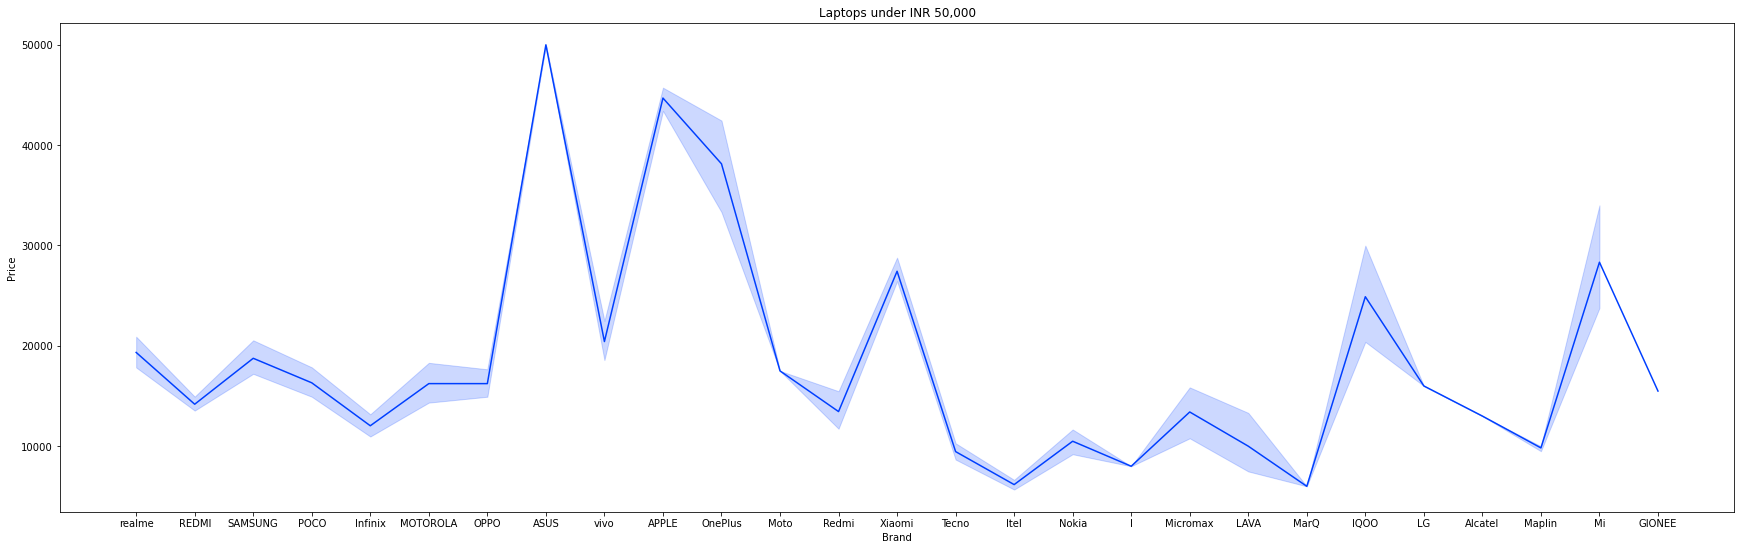

In [235]:
plt.figure(figsize = (30,9))
plt.title('Laptops under INR 50,000')
sns.lineplot(x = cst1['Brand'], y =cst1['Price'])
plt.show()

# pairplot

<Figure size 1800x1200 with 0 Axes>

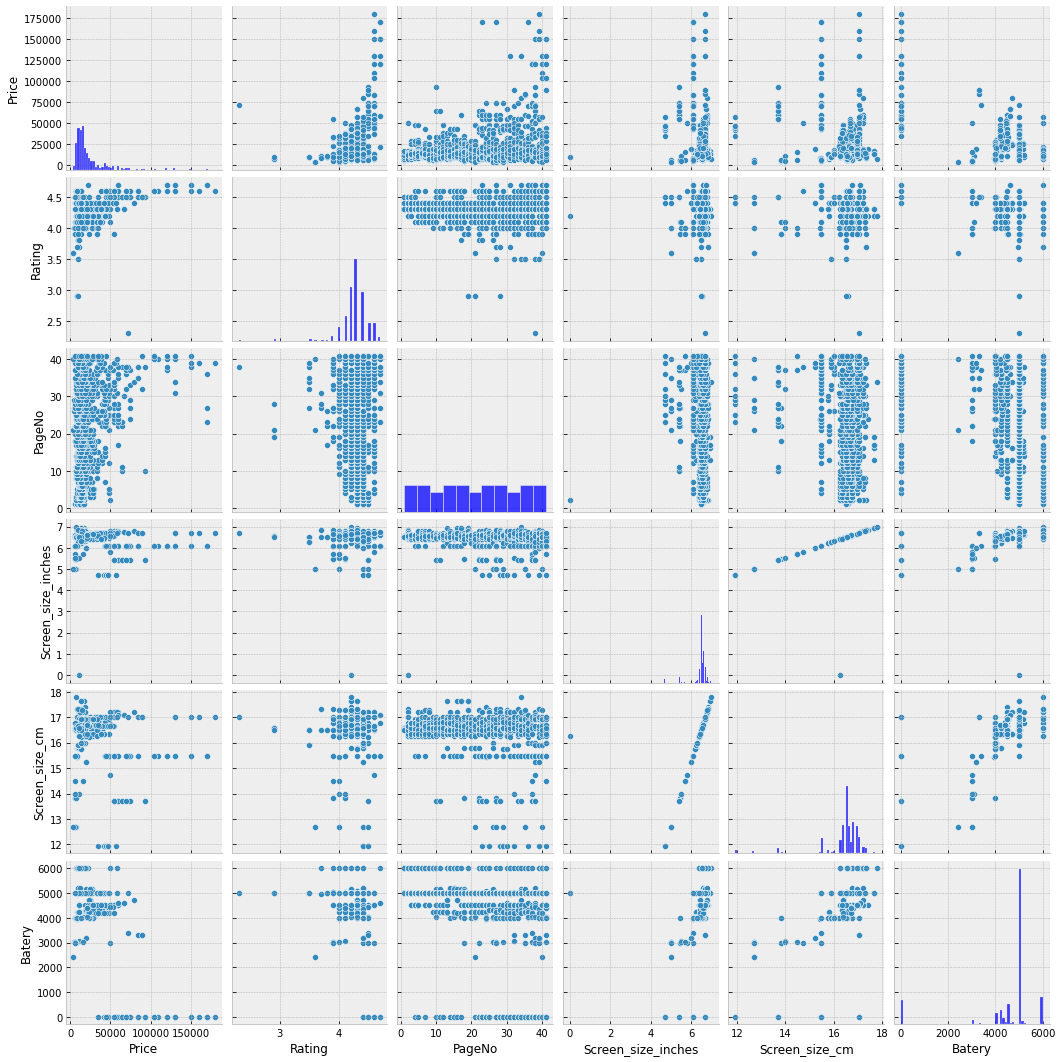

In [303]:
#Pair plot
plt.figure(dpi =300)
sns.pairplot(final_df);

LinAlgError: singular matrix

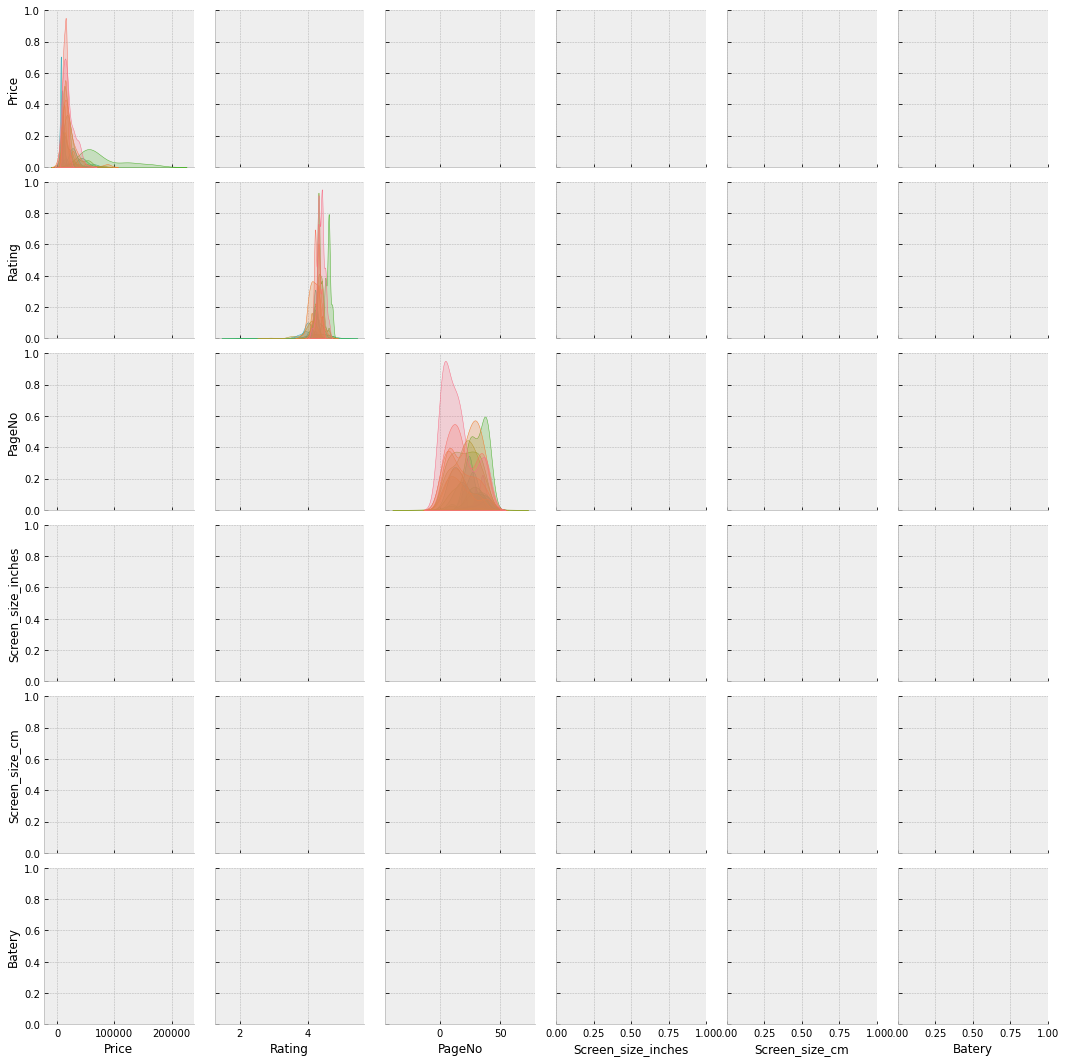

In [304]:
sns.pairplot(final_df, hue = 'Brand')
plt.show()

# Heat Map

<AxesSubplot:>

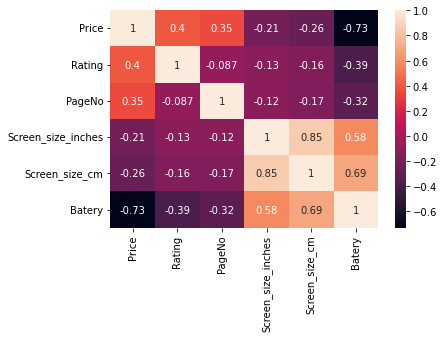

In [240]:
df_corr = final_df.corr()
sns.heatmap(df_corr,annot = True)
plt.show()

### What is the average selling price of Apple Mobiles

In [312]:
avg = final_df.groupby('Brand')['Price'].mean()

In [313]:
avg

Brand
APPLE       78024.318182
ASUS        52665.666667
Alcatel     12999.000000
GIONEE      15490.000000
I            7999.000000
IQOO        24892.000000
Infinix     12033.146341
Itel         6169.960000
LAVA         9999.000000
LG          16000.000000
MOTOROLA    16233.722222
Maplin       9826.333333
MarQ         5999.000000
Mi          28331.333333
Micromax    13406.285714
Moto        17499.000000
Nokia       10490.642857
OPPO        16232.207317
OnePlus     41821.388889
POCO        16313.661972
REDMI       14179.424528
Redmi       13447.404762
SAMSUNG     21093.810811
Tecno        9457.714286
Xiaomi      32529.392857
realme      19581.608696
vivo        23585.977011
Name: Price, dtype: float64

In [314]:
top_model = final_df.Title.value_counts().head(15)
top_model

Xiaomi 11i Hypercharge 5G (Stealth Black, 128 GB)    4
vivo T1 44W (Midnight Galaxy, 128 GB)                4
Xiaomi 11i 5G (Stealth Black, 128 GB)                4
vivo T1 5G (Rainbow Fantasy, 128 GB)                 4
Redmi 9A Sport (Metallic Blue, 32 GB)                4
POCO M4 Pro (Cool Blue, 128 GB)                      4
SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)         3
SAMSUNG Galaxy F12 (Sea Green, 64 GB)                3
realme 8 (Cyber Black, 128 GB)                       3
realme 9 Pro+ 5G (Aurora Green, 128 GB)              3
Xiaomi 11i 5G (Pacific Pearl, 128 GB)                3
Xiaomi 11i 5G (Camo Green, 128 GB)                   3
REDMI 10 Prime 2022 (Bifrost Blue, 64 GB)            3
realme GT Master Edition (Daybreak Blue, 128 GB)     3
vivo T1 Pro 5G (Turbo Black, 128 GB)                 3
Name: Title, dtype: int64

## What is the lowest and highest price mobile available
`

In [243]:
final_df[final_df['Price'] == final_df['Price'].min()]
final_df[final_df['Price'] == final_df['Price'].max()]




,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
956,"Itel A23 Pro (Lake Blue, 8 GB)",3568.0,3.6,40,1,8 GB,Itel,5.0,12.7,2400,Upto 32 GB,2MP,"3,445",286


,Title,Price,Rating,PageNo,RAM_in_GB,ROM,Brand,Screen_size_inches,Screen_size_cm,Batery,ExandableMemory,Camera,NO_of_ratings,NO_of_Reviews
929,"APPLE iPhone 13 Pro Max (Gold, 1 TB)",179900.0,4.6,39,APPLE,1 TB,APPLE,6.7,17.02,0,NaN,12MP + 12MP + 12MP | 12MP,"1,169",137
